## 91APP料視覺化實作
* 依月份
* 依星期
* 
* 本周練習依時間分群（日期、月份、星期幾、小時），繪圖觀察總銷售量隨時間的消長，得知：

* 1.依日期分群：當日總銷售量在 2017年11月11日 出現異常極大值，推測或受「雙十一購物節」促銷影響。

* 2.依月份分群：當月總銷售量高峰出現在 四、五及十一月 ，其中十一月的高銷售量極有可能是受 2017年11月11日 單日異常極高值影響。

* 3.依星期幾分群：總銷售量高峰出現在 星期二、三及周末 。周末購物潮好理解，但周間星期二、三卻出現銷售量高峰，本人不精準猜測和「週三小周末」有關，不少商家常以此作為促銷噱頭以衝高銷售量。

* 4.依小時幾分群：觀察折線圖和直方圖，發現總銷售量高峰出現在 深夜時段，可見不少用戶為夜貓族。

In [1]:
%matplotlib inline
import requests
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

In [2]:
#read 91APP DartaSets
df = pd.read_csv(r'C:\Users\chenhur\Documents\GitHub\Showa_CsxPython\Ntu_DataSet\Ntu_Orders.csv')

In [3]:
#ADD new column dateID
df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')

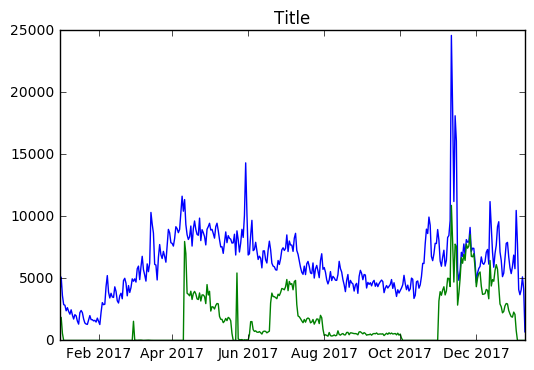

In [29]:
data_Quan = df.groupby(by='new_DateId')['Quantity'].sum()
data_Gift = df.groupby(by='new_DateId')['IsGift'].sum()
plt.title("Title")
plt.plot(data_Quan)
data_Gift = data_Gift*5
plt.plot(data_Gift)
plt.show()

* 選取2017年前半年的資料<b/>

data = df[df.new_DateId.between('2017-01-01','2017-06-30')]



* 依月份分群

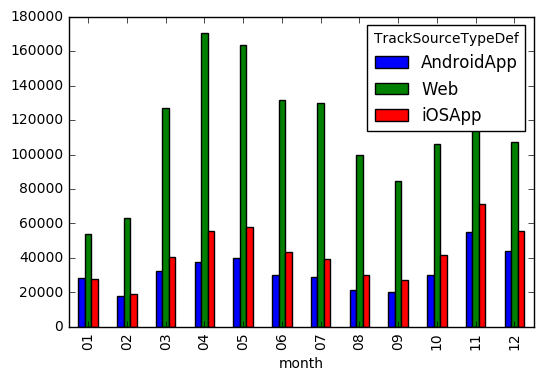

In [23]:
from datetime import datetime

#dt = datetime.strptime(a , "%Y-%m-%d').strftime('%m')

df['month'] = df['new_DateId'].dt.strftime('%m')

#TST = df.groupby('TrackSourceTypeDef').size()

df.groupby(['month', 'TrackSourceTypeDef']).size().unstack().plot.bar()

In [21]:
df.groupby(['month', 'TrackSourceTypeDef']).size()

month  TrackSourceTypeDef
01     AndroidApp             28173
       Web                    53872
       iOSApp                 27819
02     AndroidApp             18142
       Web                    62859
       iOSApp                 19004
03     AndroidApp             32184
       Web                   127294
       iOSApp                 40482
04     AndroidApp             37473
       Web                   170283
       iOSApp                 55793
05     AndroidApp             40107
       Web                   163661
       iOSApp                 57643
06     AndroidApp             29896
       Web                   131547
       iOSApp                 43265
07     AndroidApp             28736
       Web                   130209
       iOSApp                 39306
08     AndroidApp             21567
       Web                    99557
       iOSApp                 29948
09     AndroidApp             20316
       Web                    84898
       iOSApp                 27166
10

In [22]:
df.groupby(['month', 'TrackSourceTypeDef']).size().unstack()

TrackSourceTypeDef,AndroidApp,Web,iOSApp
month,,,
01,28173,53872,27819
02,18142,62859,19004
03,32184,127294,40482
04,37473,170283,55793
05,40107,163661,57643
06,29896,131547,43265
07,28736,130209,39306
08,21567,99557,29948
09,20316,84898,27166


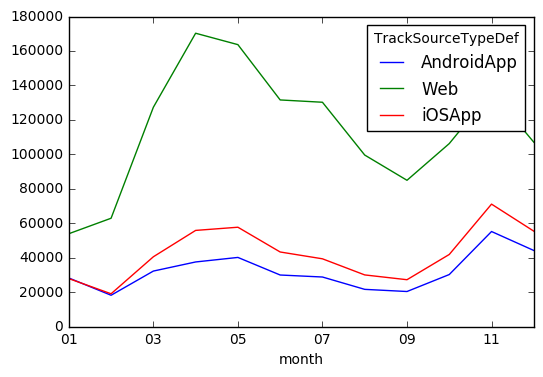

In [25]:
df.groupby(['month', 'TrackSourceTypeDef']).size().unstack().plot()

In [ ]:
df.groupby('YEARMONTH').CLIENTCODE.nunique()